Chap9. Plotting and Visualization

-Matplotlib: 매트랩과 유사한 그래프 표시를 가능케 하는 라이브러리

-seaborn: Matplotlib 에 기반한 시각화 라이브러리

(1) A Brief Matplotlib API Primer

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

matplot과 numpy 불러오기

In [3]:
data=np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

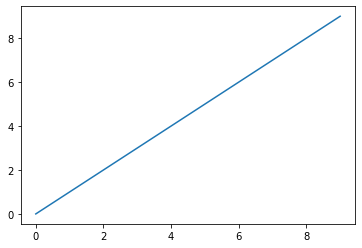

In [5]:
plt.plot(data)

data plotting 하기

In [6]:
flg=plt.figure()

<Figure size 432x288 with 0 Axes>

subplot 생성하기

In [8]:
ax1=flg.add_subplot(2,2,1)

In [10]:
ax2=flg.add_subplot(2,2,2)

In [11]:
ax3=flg.add_subplot(2,2,3)

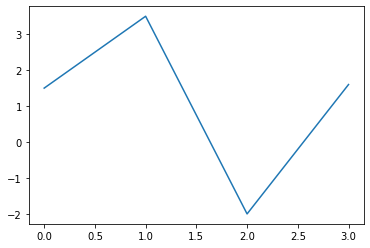

In [12]:
plt.plot([1.5,3.5,-2,1.6])

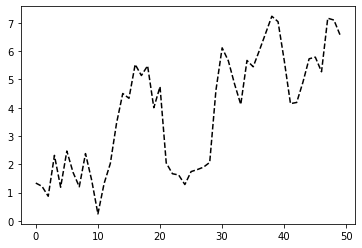

In [15]:
plt.plot(np.random.randn(50).cumsum(),'k--')

In [20]:
_=ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)

In [22]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

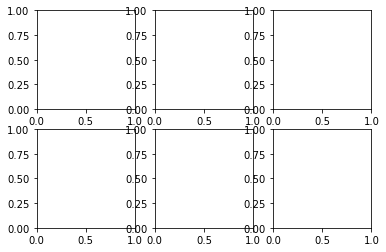

In [23]:
fig,axes=plt.subplots(2,3)

In [24]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Nrows: 서브 플롯의 행수, Ncols: 서브플롯의 열수 

Sahres: 모든 서브 플롯은 동일한 x축 눈금을 사용(xlim을 조정하면 모든 서브
                               플롯에 영향을 줍니다.)

Sharey: 모든 서브 플소은 동일한 y축 눈금을 사용합니다.

subplot_kw: 각 서브 플롯을 생성하는 데 사용되는 add_subplot 호출에 전달된
    키워드 사전

fig_kw: figure를 생성할 때 서브 플롯에 대한 추가 키워드

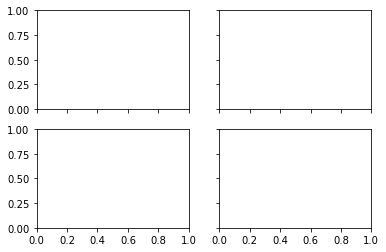

In [25]:
fig, axes=plt.subplots(2,2,sharex=True,sharey=True)

In [26]:
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

<Figure size 432x288 with 0 Axes>

In [27]:
from numpy.random import randn

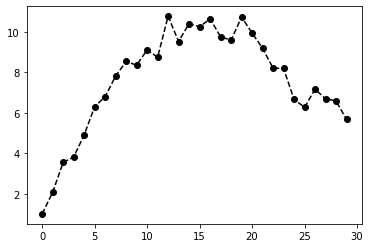

In [28]:
plt.plot(randn(30).cumsum(),'ko--')

In [31]:
data=np.random.rand(39).cumsum()

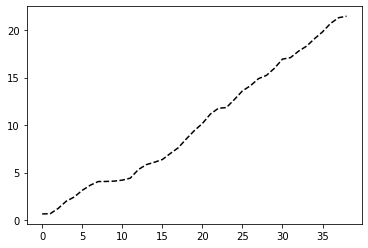

In [32]:
plt.plot(data,'k--',label='Default')

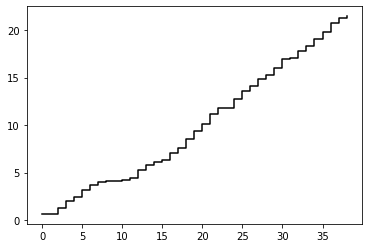

In [34]:
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')

No handles with labels found to put in legend.


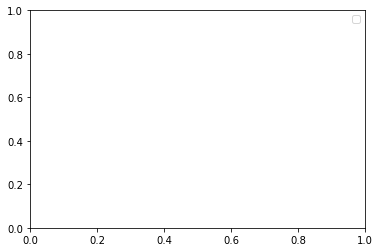

In [35]:
plt.legend(loc='best')

In [36]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [37]:
ax=fig.add_subplot(1,1,1)

In [39]:
ax.plot(np.random.randn(1000).cumsum())

In [40]:
ticks=ax.set_xticks([0,250,500,750,1000])

In [42]:
labels=ax.set_xticklabels(['one','two','three','four','five'],
                         ....: rotation=30,fontsize='small')

In [43]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [44]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

In [46]:
from numpy.random import randn

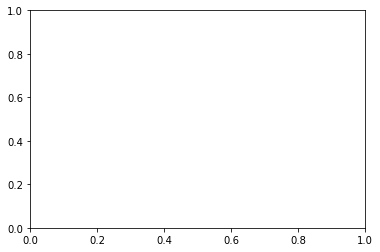

In [47]:
fig=plt.figure(); ax=fig.add_subplot(1,1,1)

In [48]:
ax.plot(randn(1000).cumsum(), 'k',label='one')

In [49]:
ax.plot(randn(1000).cumsum(), 'k--',label='two')

In [50]:
ax.plot(randn(1000).cumsum(), 'k',label='three')

In [51]:
ax.legend(loc='best')

In [53]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [54]:
ax=fig.add_subplot(1,1,1)

In [55]:
rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)

In [56]:
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)

In [57]:
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],
                color='g',alpha=0.5)

In [58]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

Chap10. 데이터 집계와 그룹 연산

GroupBy 메카닉

In [60]:
import pandas as pd

In [70]:
from pandas import DataFrame,Series 

In [72]:
df=pd.DataFrame({'key1':['a','a','b','b','a'],
                'key2':['one','two','one','two','one'],
                'data1':np.random.randn(5),
                'data2':np.random.randn(5)})

In [73]:
df

,key1,key2,data1,data2
0,a,one,0.508611,-0.574955
1,a,two,0.781794,-0.406736
2,b,one,0.509152,0.339838
3,b,two,-0.306542,0.187058
4,a,one,-1.312059,0.344910


In [75]:
grouped=df['data1'].groupby(df['key1'])

In [76]:
grouped

In [77]:
grouped.mean()

key1
a   -0.007218
b    0.101305
Name: data1, dtype: float64

In [78]:
means=df['data1'].groupby([df['key1'],df['key2']]).mean()

In [79]:
means

key1  key2
a     one    -0.401724
      two     0.781794
b     one     0.509152
      two    -0.306542
Name: data1, dtype: float64

In [80]:
df

,key1,key2,data1,data2
0,a,one,0.508611,-0.574955
1,a,two,0.781794,-0.406736
2,b,one,0.509152,0.339838
3,b,two,-0.306542,0.187058
4,a,one,-1.312059,0.344910


In [81]:
means.unstack()

key2,one,two
key1,,
a,-0.401724,0.781794
b,0.509152,-0.306542


In [82]:
states=np.array(['Ohio','California','California','Ohio','Ohio'])

In [83]:
years=np.array([2005,2005,2006,2005,2006])

In [84]:
df['data1'].groupby([states,years]).mean()

California  2005    0.781794
            2006    0.509152
Ohio        2005    0.101035
            2006   -1.312059
Name: data1, dtype: float64

In [85]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.007218,-0.212260
b,0.101305,0.263448


In [86]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one  -0.401724 -0.115022
     two   0.781794 -0.406736
b    one   0.509152  0.339838
     two  -0.306542  0.187058

In [87]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64